In [3]:
fichier = open('The-Lord-of-the-Rings.txt', 'r', encoding='utf-8')

# Lire le contenu du fichier
contenu = fichier.read()

# Afficher le contenu du fichier
print(contenu[:500])

THE LORD

OF THE RINGS


BY

J.R.R. TOLKIEN



ILLUSTRATED BY

Alan Lee





Three Rings for the Elven-kings under the sky,



Seven for the Dwarf-lords in their halls of stone,





Nine for Mortal Men doomed to die,



One for the Dark Lord on his dark throne





In the Land of Mordor where the Shadows lie.



One Ring to rule them all, One Ring to find them,





One Ring to bring them all and in the darkness bind them



In the Land of Mordor where the Shadows lie.





Contents





Title 


In [4]:
# Mettre en minuscules:
contenu =contenu.lower() 

print(contenu[:100])

the lord

of the rings


by

j.r.r. tolkien



illustrated by

alan lee





three rings for the elv


In [5]:
#tokenisation des phrases:
from nltk.tokenize import PunktSentenceTokenizer 

# Créer un tokenizer
tokenizer = PunktSentenceTokenizer()

# Utiliser le tokenizer pour tokeniser le contenu du fichier
phrases = tokenizer.tokenize(contenu.lower())


# Afficher les phrases tokenisées
for phrase in phrases:
    print(phrase[:100])

the lord

of the rings


by

j.r.r.
tolkien



illustrated by

alan lee





three rings for the elven-kings under the sky,



seven for
one ring to rule them all, one ring to find them,





one ring to bring them all and in the darknes
contents





title page

note on the text

note on the 50th anniversary edition

foreword to the se
tolkien

copyright

about the publisher





note on the text


j.r.r.
tolkien’s the lord of the rings is often erroneously called a trilogy, when it is in fact a single n
the first volume, the fellowship of the ring, was published in great britain by the london firm geor
in the production of this first volume, tolkien experienced what became for him a continual problem:
these ‘corrections’ include the altering of dwarves to dwarfs, elvish to elfish, further to farther,
in a work such as the lord of the rings, containing invented languages and delicately constructed no
even before the publication of the third volume, which contained much hitherto unreve

In [6]:
#Tokenisation des mots:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
   
mots = word_tokenize(contenu, language='english')

print(mots[:100])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the', 'lord', 'of', 'the', 'rings', 'by', 'j.r.r', '.', 'tolkien', 'illustrated', 'by', 'alan', 'lee', 'three', 'rings', 'for', 'the', 'elven-kings', 'under', 'the', 'sky', ',', 'seven', 'for', 'the', 'dwarf-lords', 'in', 'their', 'halls', 'of', 'stone', ',', 'nine', 'for', 'mortal', 'men', 'doomed', 'to', 'die', ',', 'one', 'for', 'the', 'dark', 'lord', 'on', 'his', 'dark', 'throne', 'in', 'the', 'land', 'of', 'mordor', 'where', 'the', 'shadows', 'lie', '.', 'one', 'ring', 'to', 'rule', 'them', 'all', ',', 'one', 'ring', 'to', 'find', 'them', ',', 'one', 'ring', 'to', 'bring', 'them', 'all', 'and', 'in', 'the', 'darkness', 'bind', 'them', 'in', 'the', 'land', 'of', 'mordor', 'where', 'the', 'shadows', 'lie', '.', 'contents', 'title', 'page', 'note', 'on', 'the']


In [7]:
#Création du stop_words:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def stop_words_filtering(mots) : 
    tokens = [mot for mot in mots if mot not in stop_words]
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Mots ajoutez dans le stop words:
mots_personnalises = [',', ':', ';','.','?','!', "''",'‘','’','(', ')']
stop_words.update(mots_personnalises)

In [9]:
#Application du stop_words:
mots_filtered = stop_words_filtering(mots)
print(mots_filtered[:100])

['lord', 'rings', 'j.r.r', 'tolkien', 'illustrated', 'alan', 'lee', 'three', 'rings', 'elven-kings', 'sky', 'seven', 'dwarf-lords', 'halls', 'stone', 'nine', 'mortal', 'men', 'doomed', 'die', 'one', 'dark', 'lord', 'dark', 'throne', 'land', 'mordor', 'shadows', 'lie', 'one', 'ring', 'rule', 'one', 'ring', 'find', 'one', 'ring', 'bring', 'darkness', 'bind', 'land', 'mordor', 'shadows', 'lie', 'contents', 'title', 'page', 'note', 'text', 'note', '50th', 'anniversary', 'edition', 'foreword', 'second', 'edition', 'prologue', 'fellowship', 'ring', 'book', 'one', 'chapter', '1', 'long-expected', 'party', 'chapter', '2', 'shadow', 'past', 'chapter', '3', 'three', 'company', 'chapter', '4', 'short', 'cut', 'mushrooms', 'chapter', '5', 'conspiracy', 'unmasked', 'chapter', '6', 'old', 'forest', 'chapter', '7', 'house', 'tom', 'bombadil', 'chapter', '8', 'fog', 'barrow-downs', 'chapter', '9', 'sign', 'prancing', 'pony']


In [10]:
#Création du wordcloud:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(background_color="black", max_words=50, stopwords=stop_words, max_font_size=50, random_state=42)

In [11]:
text = ""
for mot in mots_filtered:
    text += mot + " "

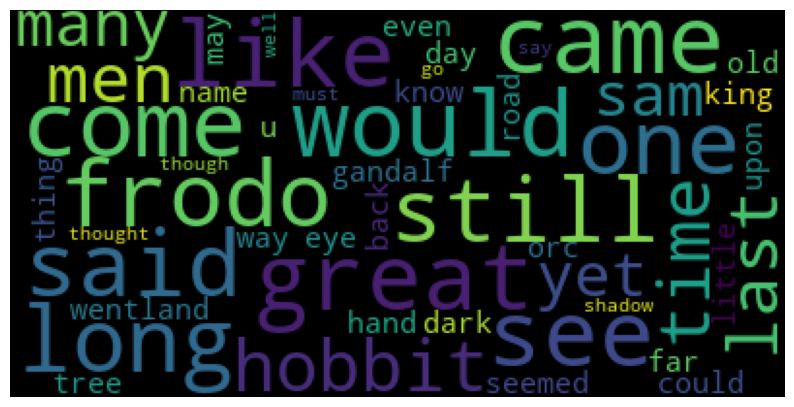

In [12]:
plt.figure(figsize= (10,6)) 
wc.generate(text)           
plt.imshow(wc) 
plt.axis("off")
plt.show()

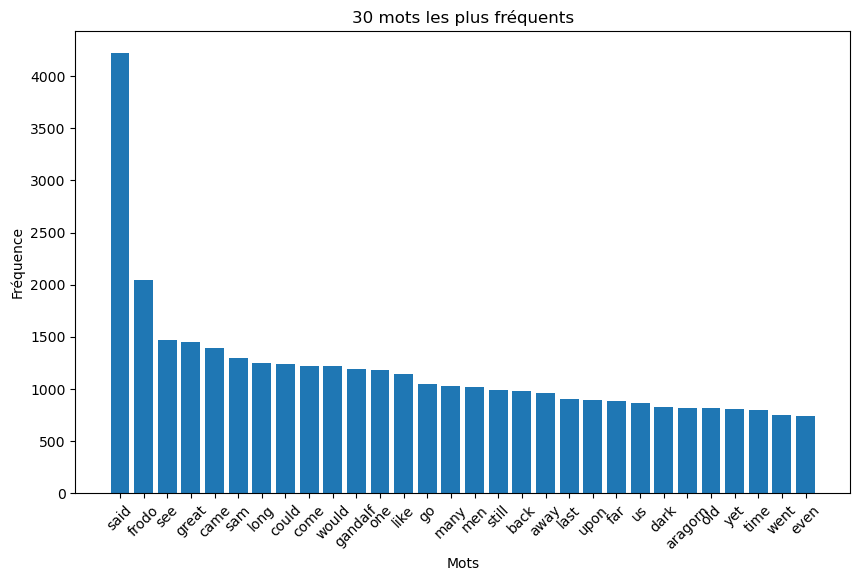

In [13]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

freq_dist = FreqDist(mots_filtered)

# Obtenir les 30 mots les plus fréquents
mots_frequents = freq_dist.most_common(30)

# Extraire les mots et les fréquences
mots = [mot[0] for mot in mots_frequents]
frequences = [mot[1] for mot in mots_frequents]

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(mots, frequences)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('30 mots les plus fréquents')
plt.xticks(rotation=45)
plt.show()

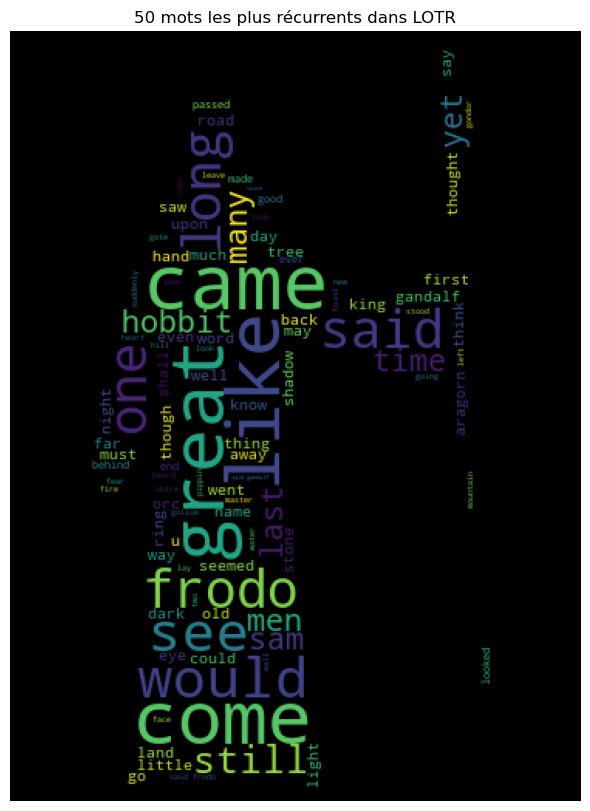

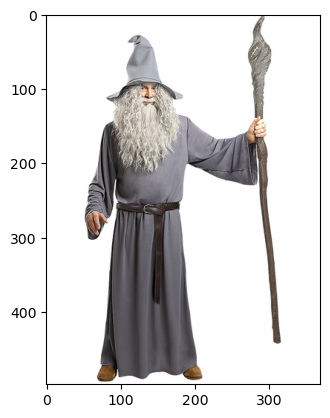

In [14]:


from PIL import Image
import numpy as np

def plot_word_cloud(text, masque, background_color = "black") :
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=100, stopwords=stop_words, mask = mask_coloring, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.title("50 mots les plus récurrents dans LOTR")
    plt.axis('off')
    plt.show()

plot_word_cloud(text, "gandalf2.jpg")

# Code d'affichage du masque
import matplotlib.image as mpimg
img = mpimg.imread("gandalf2.jpg")
plt.imshow(img)
plt.show()